50%          50%          50%          50%          50%          50% 
-0.006530623 -0.402029935 -0.427668818 -0.764981573 -1.179314911 -0.706116024 
         50%          50%          50%          50%          50%          50% 
-0.775174048 -0.258603280 -0.142457098 -0.345721687  0.015380247 -0.782618981 
         50%          50%          50%          50%          50%          50% 
-0.523316012  0.168048315 -0.195509080 -0.192774963  0.411904596  0.400420395 
         50%          50%          50%          50%          50%          50% 
-0.309497657  0.168637458  0.137563915  0.059245704  0.724555497  0.918177102 
         50%          50%          50%          50%          50%          50% 
 0.685984018  0.773317166  0.382713404  0.517287366  1.288326858  1.232442423 
         50% 
 1.130236704

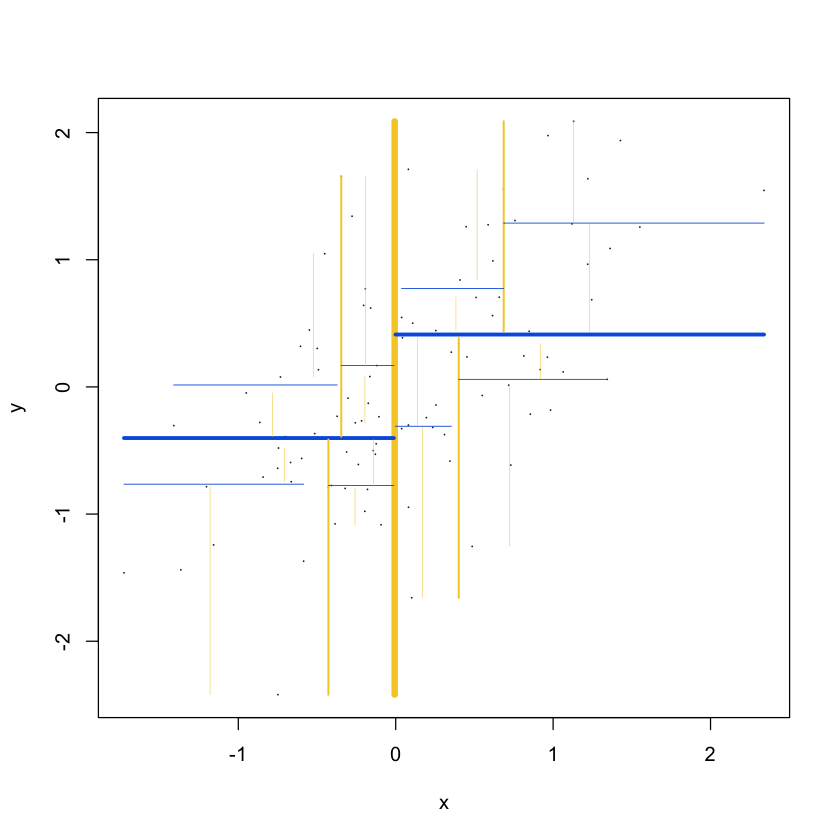

In [3]:
myQuadTree <- function(x, y, k=6, doPlot = FALSE)
{
    m <- quantile(x, 0.5)
    if((k %% 2 == 0) & doPlot) lines(c(m,m), range(y), col = "#F5CE32", lwd = 0.4+0.3*k*k)
    if(k %% 2 == 1)
    {
        m <- quantile(x, 0.5)
        if(doPlot) lines(range(y), c(m,m), col = "#0360E1", lwd = 0.4+0.3*k*k)
    } 
    if(k > 0)
    {
        m1 <- myQuadTree(y[x<m], x[x<m], k-1, doPlot)
        m2 <- myQuadTree(y[x>=m], x[x>=m], k-1, doPlot)
        returnedVals <- c(m, m1, m2)
        returnedVals[is.na(returnedVals)] <- 0.0
        return(returnedVals)
    } else {
        return(m)
    }
}

x = rnorm(100)/sqrt(2)
y = (x+rnorm(100))/sqrt(2)
plot(x,y, pch =16, cex=0.2, col = "#222223")
myQuadTree(x, y, k=4, doPlot=TRUE)

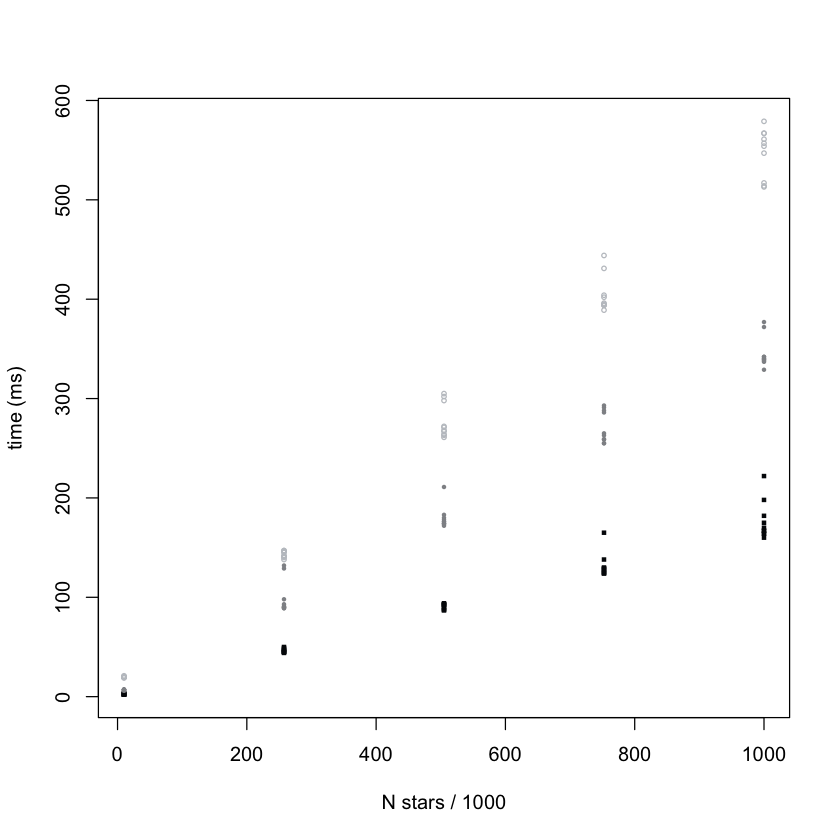

In [9]:
x <- runif(1000000)
y <- runif(1000000)

howLongDoesItTake <- function(N, k)
{
    before <- proc.time()
    features <- myQuadTree(x[1:N],y[1:N],k=k,doPlot=FALSE)
    after <- proc.time()
    return((after - before)[[1]])
}

Ns <- rep(seq(from = 0.01, to = 1.0, length.out = 5)*10**6,10)
tOfNk2 <- sapply(Ns, function(N) howLongDoesItTake(N, 2))
tOfNk4 <- sapply(Ns, function(N) howLongDoesItTake(N, 4))
tOfNk6 <- sapply(Ns, function(N) howLongDoesItTake(N, 6))
                 
plot(rep(Ns, 3)/1000, 1000*c(tOfNk2, tOfNk4, tOfNk6), xlab = "N stars / 1000", ylab = "time (ms)", pch = rep(c(15,16,21), each = length(Ns)), cex = 0.5, col = rep(c("#04060A","#909295","#C0C4C9"), each = length(Ns)))


### Contamination

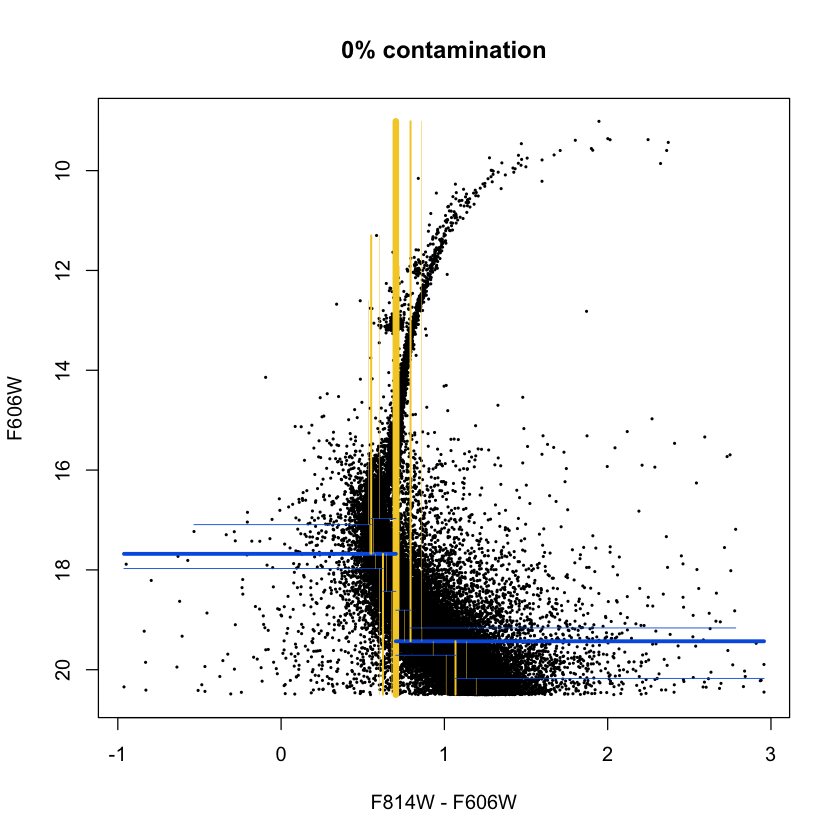

In [26]:
ngc104path <- 'val_ori/ngc0104_meth1.csv'
cmd <- read.csv(ngc104path, header = FALSE) #read the file
cmd <- cmd[(cmd$V1 - cmd$V2) > -1 & (cmd$V1 - cmd$V2) < 3, ] #set some limits on color
x <- cmd$V1 - cmd$V2 #F814W - F606W
y <- -cmd$V2 #F606W; in the actual plot we will reverse the axis properly
plot(x,-y,pch = 16, cex = 0.35, xlab = 'F814W - F606W', ylab = 'F606W', ylim=rev(range(-y)), main = "0% contamination")
features_0 <- myQuadTree(x,-y,k=4,doPlot=TRUE) #-y and reversedAxis=TRUE for plotting purposes only

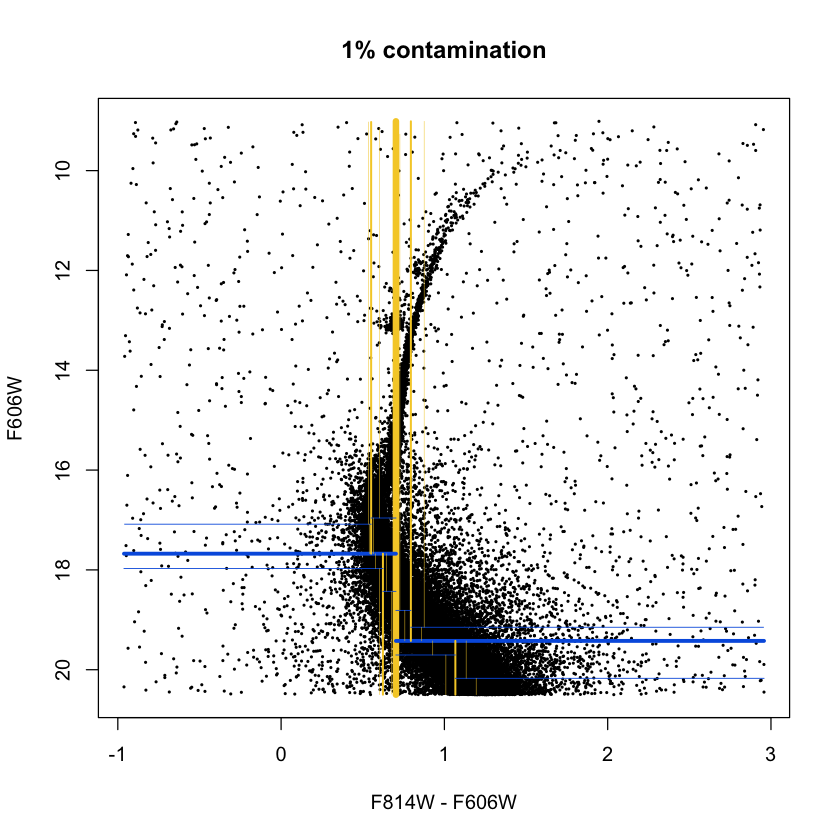

In [21]:
contaminate <- function(x, y, p)
{
    contaminandes <- runif(length(x)) < p
    mx <- min(x)
    my <- min(y)
    x[contaminandes] <- mx + runif(length(x[contaminandes]))*(max(x) - mx)
    y[contaminandes] <- my + runif(length(y[contaminandes]))*(max(y) - my)    
    return(list(x=x,y=y))
}

ngc104path <- 'val_ori/ngc0104_meth1.csv'
cmd <- read.csv(ngc104path, header = FALSE) #read the file
cmd <- cmd[(cmd$V1 - cmd$V2) > -1 & (cmd$V1 - cmd$V2) < 3, ] #set some limits on color
l <- contaminate(cmd$V1 - cmd$V2, -cmd$V2, 0.01) #F814W - F606W
x <- l$x
y <- l$y
plot(x,-y,pch = 16, cex = 0.35, xlab = 'F814W - F606W', ylab = 'F606W', ylim=rev(range(-y)), main = "1% contamination")
features_001 <- myQuadTree(x,-y,k=4,doPlot=TRUE) #-y and reversedAxis=TRUE for plotting purposes only

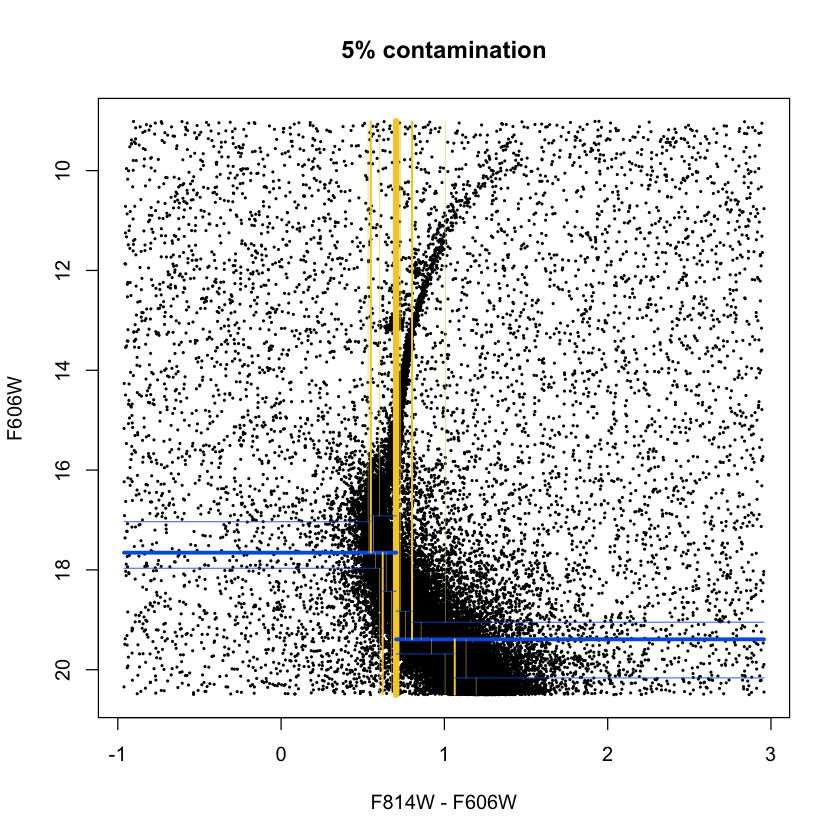

In [22]:
ngc104path <- 'val_ori/ngc0104_meth1.csv'
cmd <- read.csv(ngc104path, header = FALSE) #read the file
cmd <- cmd[(cmd$V1 - cmd$V2) > -1 & (cmd$V1 - cmd$V2) < 3, ] #set some limits on color
l <- contaminate(cmd$V1 - cmd$V2, -cmd$V2, 0.05) #F814W - F606W
x <- l$x
y <- l$y
plot(x,-y,pch = 16, cex = 0.35, xlab = 'F814W - F606W', ylab = 'F606W', ylim=rev(range(-y)), main = "5% contamination")
features_005 <- myQuadTree(x,-y,k=4,doPlot=TRUE) #-y and reversedAxis=TRUE for plotting purposes only

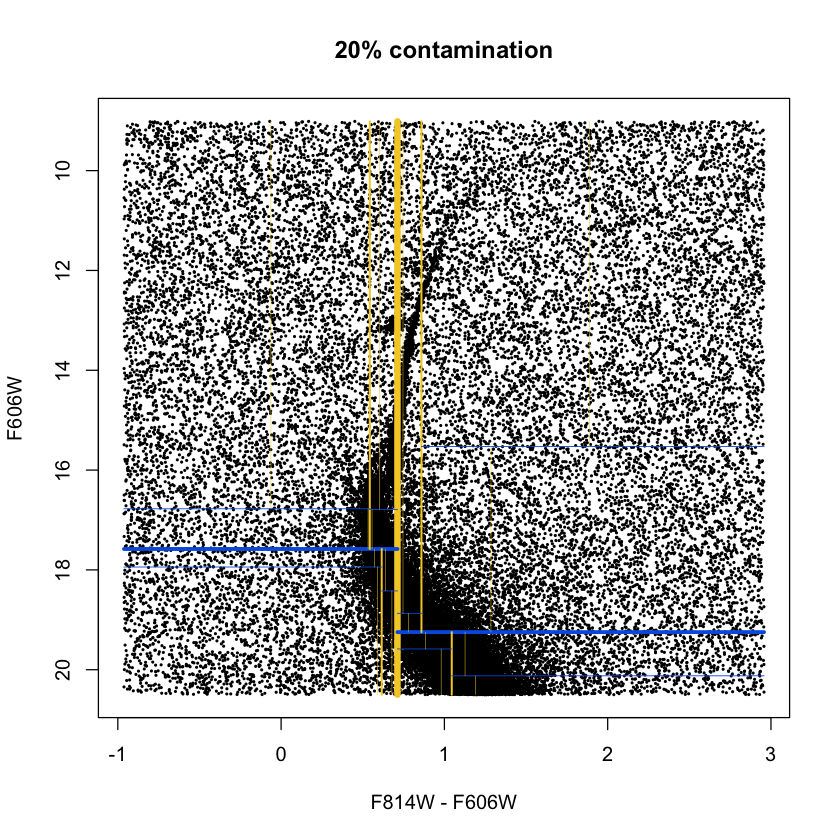

In [28]:
ngc104path <- 'val_ori/ngc0104_meth1.csv'
cmd <- read.csv(ngc104path, header = FALSE) #read the file
cmd <- cmd[(cmd$V1 - cmd$V2) > -1 & (cmd$V1 - cmd$V2) < 3, ] #set some limits on color
l <- contaminate(cmd$V1 - cmd$V2, -cmd$V2, 0.2) #F814W - F606W
x <- l$x
y <- l$y
plot(x,-y,pch = 16, cex = 0.35, xlab = 'F814W - F606W', ylab = 'F606W', ylim=rev(range(-y)), main = "20% contamination")
features_02 <- myQuadTree(x,-y,k=4,doPlot=TRUE) #-y and reversedAxis=TRUE for plotting purposes only

### Photometric error

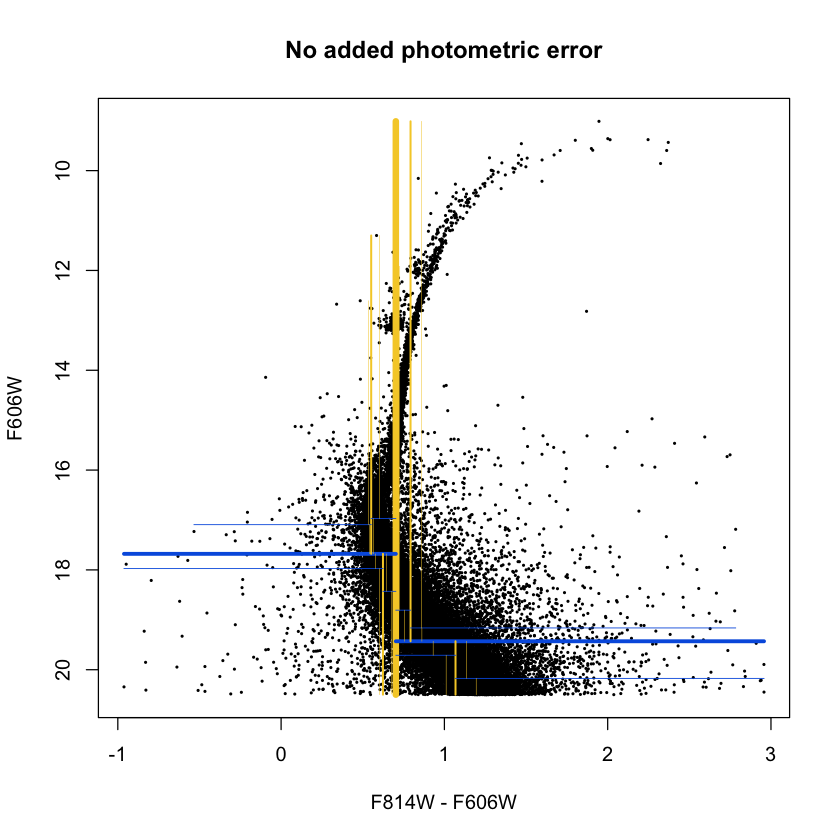

In [36]:
ngc104path <- 'val_ori/ngc0104_meth1.csv'
cmd <- read.csv(ngc104path, header = FALSE) #read the file
cmd <- cmd[(cmd$V1 - cmd$V2) > -1 & (cmd$V1 - cmd$V2) < 3, ] #set some limits on color
x <- cmd$V1 - cmd$V2 #F814W - F606W
y <- -cmd$V2 #F606W; in the actual plot we will reverse the axis properly
plot(x,-y,pch = 16, cex = 0.35, xlab = 'F814W - F606W', ylab = 'F606W', ylim=rev(range(-y)), main = "No added photometric error")
features_0pho <- myQuadTree(x,-y,k=4,doPlot=TRUE) #-y and reversedAxis=TRUE for plotting purposes only

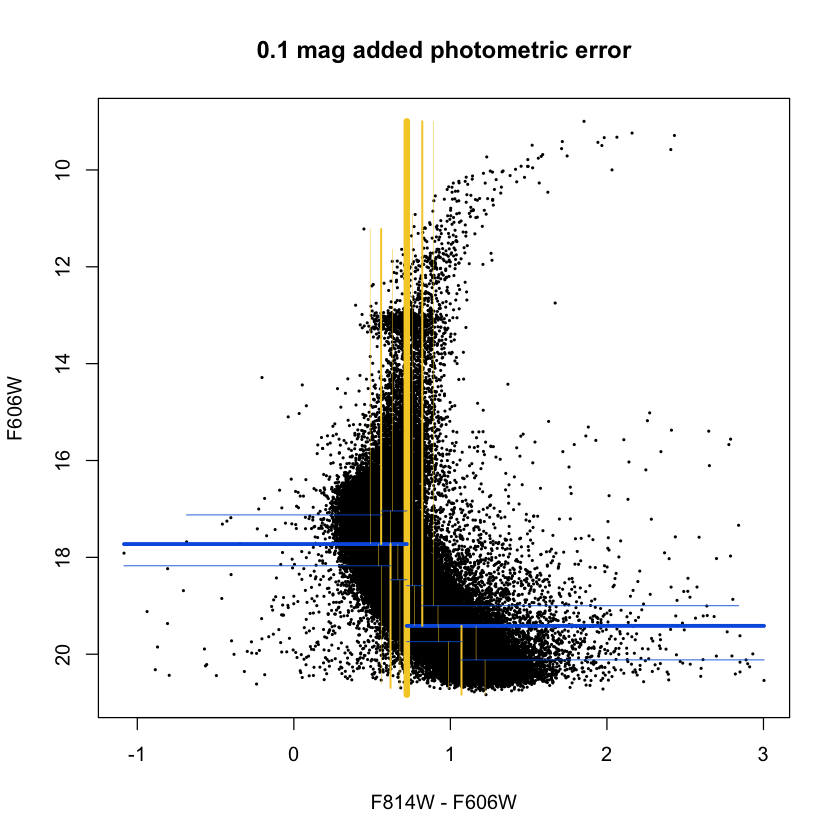

In [31]:
ngc104path <- 'val_ori/ngc0104_meth1.csv'
cmd <- read.csv(ngc104path, header = FALSE) #read the file
cmd <- cmd[(cmd$V1 - cmd$V2) > -1 & (cmd$V1 - cmd$V2) < 3, ] #set some limits on color
x <- cmd$V1 - cmd$V2 #F814W - F606W
y <- -cmd$V2 #F606W; in the actual plot we will reverse the axis properly
x <- x + 0.1*rnorm(x)
y <- y + 0.1*rnorm(y)
plot(x,-y,pch = 16, cex = 0.35, xlab = 'F814W - F606W', ylab = 'F606W', ylim=rev(range(-y)), main = "0.1 mag added photometric error")
features_01pho <- myQuadTree(x,-y,k=4,doPlot=TRUE) #-y and reversedAxis=TRUE for plotting purposes only

### Subsampling

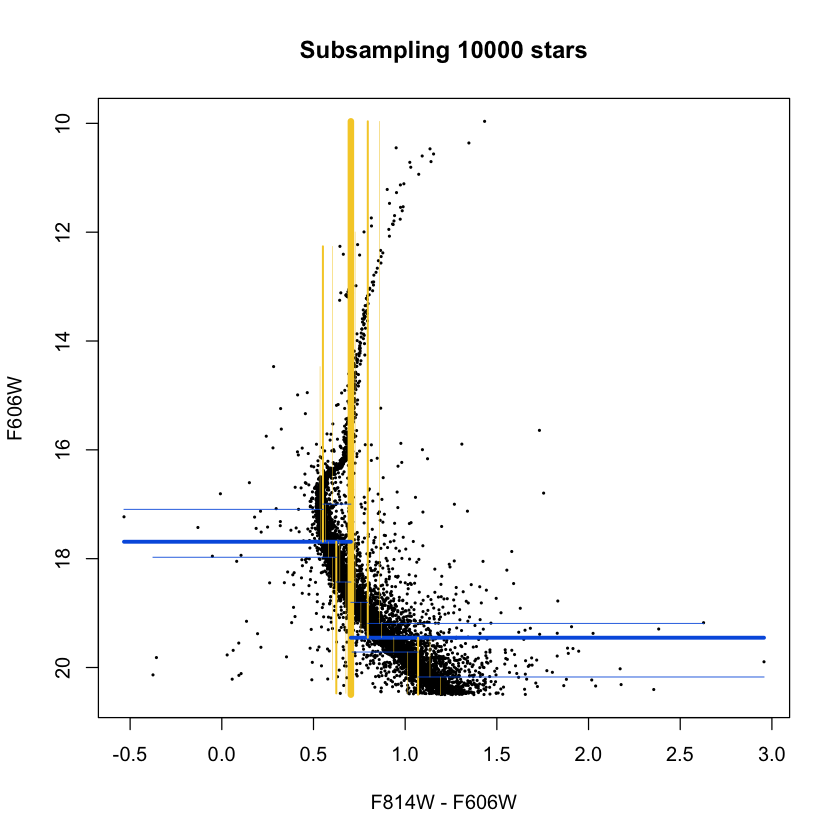

In [37]:
ngc104path <- 'val_ori/ngc0104_meth1.csv'
cmd <- read.csv(ngc104path, header = FALSE) #read the file
cmd <- cmd[(cmd$V1 - cmd$V2) > -1 & (cmd$V1 - cmd$V2) < 3, ] #set some limits on color
x <- cmd$V1 - cmd$V2 #F814W - F606W
y <- -cmd$V2 #F606W; in the actual plot we will reverse the axis properly
s <- sample(1:length(x), 10000)
x <- x[s]
y <- y[s]
plot(x,-y,pch = 16, cex = 0.35, xlab = 'F814W - F606W', ylab = 'F606W', ylim=rev(range(-y)), main = "Subsampling 10000 stars")
features_10000pho <- myQuadTree(x,-y,k=4,doPlot=TRUE) #-y and reversedAxis=TRUE for plotting purposes only

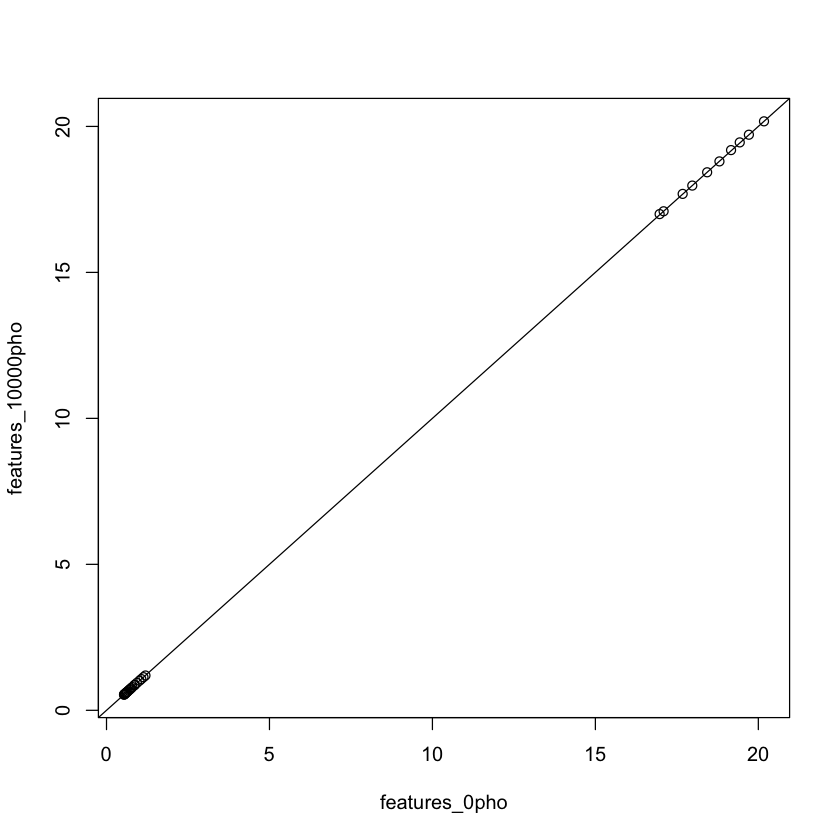

In [39]:
plot(features_0pho, features_10000pho)
abline(0,1)

### Reading in all files 

In [4]:
pathOfReal <- 'val_ori/'
realCMDFiles <- system(paste('ls ', pathOfReal, sep = ''), intern = TRUE)

realGCs <- paste(pathOfReal, realCMDFiles, sep = "")
realGCs

[1] "val_ori/ngc0104_meth1.csv" "val_ori/ngc0288_meth1.csv"
 [3] "val_ori/ngc0362_meth1.csv" "val_ori/ngc1261_meth1.csv"
 [5] "val_ori/ngc1851_meth1.csv" "val_ori/ngc2298_meth1.csv"
 [7] "val_ori/ngc2808_meth1.csv" "val_ori/ngc3201_meth1.csv"
 [9] "val_ori/ngc4590_meth1.csv" "val_ori/ngc4833_meth1.csv"
[11] "val_ori/ngc5024_meth1.csv" "val_ori/ngc5053_meth1.csv"
[13] "val_ori/ngc5272_meth1.csv" "val_ori/ngc5286_meth1.csv"
[15] "val_ori/ngc5466_meth1.csv" "val_ori/ngc5897_meth1.csv"
[17] "val_ori/ngc5904_meth1.csv" "val_ori/ngc5927_meth1.csv"
[19] "val_ori/ngc5986_meth1.csv" "val_ori/ngc6093_meth1.csv"
[21] "val_ori/ngc6101_meth1.csv" "val_ori/ngc6121_meth1.csv"
[23] "val_ori/ngc6144_meth1.csv" "val_ori/ngc6171_meth1.csv"
[25] "val_ori/ngc6205_meth1.csv" "val_ori/ngc6218_meth1.csv"
[27] "val_ori/ngc6254_meth1.csv" "val_ori/ngc6304_meth1.csv"
[29] "val_ori/ngc6341_meth1.csv" "val_ori/ngc6352_meth1.csv"
[31] "val_ori/ngc6362_meth1.csv" "val_ori/ngc6366_meth1.csv"
[33] "val_ori/ngc6388_meth1.csv" "val_ori/ngc6397_meth1.csv"
[35] "val_ori/ngc6441_meth1.csv" "val_ori/ngc6496_meth1.csv"
[37] "val_ori/ngc6535_meth1.csv" "val_ori/ngc6541_meth1.csv"
[39] "val_ori/ngc6584_meth1.csv" "val_ori/ngc6624_meth1.csv"
[41] "val_ori/ngc6637_meth1.csv" "val_ori/ngc6652_meth1.csv"
[43] "val_ori/ngc6656_meth1.csv" "val_ori/ngc6681_meth1.csv"
[45] "val_ori/ngc6715_meth1.csv" "val_ori/ngc6717_meth1.csv"
[47] "val_ori/ngc6723_meth1.csv" "val_ori/ngc6752_meth1.csv"
[49] "val_ori/ngc6779_meth1.csv" "val_ori/ngc6791_meth1.csv"
[51] "val_ori/ngc6809_meth1.csv" "val_ori/ngc6838_meth1.csv"
[53] "val_ori/ngc6934_meth1.csv" "val_ori/ngc6981_meth1.csv"
[55] "val_ori/ngc7078_meth1.csv" "val_ori/ngc7089_meth1.csv"
[57] "val_ori/ngc7099_meth1.csv"

In [20]:
removeMedian <- TRUE #keep true for making the nice plot, otherwise should be false
realGC_features <- sapply(realGCs, function(realGC)
    {
        cmd <- read.csv(realGC, header = FALSE) #read the file
        cmd <- cmd[(cmd$V1 - cmd$V2) > -1 & (cmd$V1 - cmd$V2) < 3, ] #set some limits on color
        x <- cmd$V1 - cmd$V2 #F814W - F606W
        y <- -cmd$V2 #F606W; in the actual plot we will reverse the axis properly
        #plot(x,-y,pch = 16, cex = 0.35, xlab = 'F814W - F606W', ylab = 'F606W', ylim=rev(range(-y)))
        if(removeMedian)
        {
            x <- x - median(x)
            y <- y - median(y)
        }
        features <- myQuadTree(x,-y,k=4,doPlot=FALSE) #-y and reversedAxis=TRUE for plotting purposes only
    })

In [21]:
cluster_names <- names(realGC_features)
realGC_features <- t(realGC_features)

In [22]:
head(realGC_features)

50% 50%      50%     50%      50%     50%    
val_ori/ngc0104_meth1.csv 0   -0.83480 -0.1509 -1.41975 -0.1660 -0.1628
val_ori/ngc0288_meth1.csv 0   -0.81070 -0.1294 -1.48070 -0.1432 -0.1381
val_ori/ngc0362_meth1.csv 0   -0.76350 -0.1343 -1.44410 -0.1529 -0.1474
val_ori/ngc1261_meth1.csv 0   -0.58510 -0.0900 -1.14630 -0.1018 -0.0995
val_ori/ngc1851_meth1.csv 0   -0.67140 -0.1187 -1.33160 -0.1369 -0.1309
val_ori/ngc2298_meth1.csv 0   -0.66495 -0.0925 -1.27225 -0.1117 -0.1052
                          50%      50%     50%      50%      ⋯ 50%     50%    
val_ori/ngc0104_meth1.csv -1.54165 -0.1007 -0.13570 -0.07880 ⋯ 0.64970 0.15725
val_ori/ngc0288_meth1.csv -1.16370 -0.1097 -0.11620 -0.05865 ⋯ 0.58800 0.07930
val_ori/ngc0362_meth1.csv -1.25605 -0.1009 -0.11660 -0.06380 ⋯ 0.52000 0.12680
val_ori/ngc1261_meth1.csv -1.00920 -0.0711 -0.07770 -0.04130 ⋯ 0.18895 0.09590
val_ori/ngc1851_meth1.csv -1.20270 -0.0884 -0.10210 -0.05710 ⋯ 0.33480 0.12325
val_ori/ngc2298_meth1.csv -1.05475 -0.0749 -0.07685 -0.04030 ⋯ 0.43075 0.08490
                          50%    50%     50%     50%     50%    50%     50%    
val_ori/ngc0104_meth1.csv 0.1596 0.36550 1.19725 0.22860 0.3082 1.66080 0.43140
val_ori/ngc0288_meth1.csv 0.1097 0.25960 1.02025 0.15695 0.2173 1.51370 0.29865
val_ori/ngc0362_meth1.csv 0.1028 0.24855 1.07860 0.13900 0.2013 1.57760 0.30100
val_ori/ngc1261_meth1.csv 0.0737 0.12220 0.81500 0.07050 0.0994 1.06325 0.16470
val_ori/ngc1851_meth1.csv 0.0897 0.19225 0.99650 0.10665 0.1540 1.37645 0.24080
val_ori/ngc2298_meth1.csv 0.0661 0.13260 0.82285 0.08470 0.1142 1.16395 0.15620
                          50%    
val_ori/ngc0104_meth1.csv 0.49220
val_ori/ngc0288_meth1.csv 0.37660
val_ori/ngc0362_meth1.csv 0.37460
val_ori/ngc1261_meth1.csv 0.16465
val_ori/ngc1851_meth1.csv 0.27430
val_ori/ngc2298_meth1.csv 0.18160

In [24]:
library(tsne)
if(removeMedian)
{
    tsne_realGC_features <- tsne(realGC_features[,2:ncol(realGC_features)], perplexity=8, max_iter=10000)
} else
{
    tsne_realGC_features <- tsne(realGC_features, perplexity=8, max_iter=10000)    
}

sigma summary: Min. : 0.324854263163048 |1st Qu. : 0.471308642554477 |Median : 0.57366811744123 |Mean : 0.559836892963766 |3rd Qu. : 0.645364707251912 |Max. : 0.810299037484759 |
Epoch: Iteration #100 error is: 21.5959850641035
Epoch: Iteration #200 error is: 2.04490861947906
Epoch: Iteration #300 error is: 1.46822224054026
Epoch: Iteration #400 error is: 1.36215999282508
Epoch: Iteration #500 error is: 1.29187381074036
Epoch: Iteration #600 error is: 1.25741063826465
Epoch: Iteration #700 error is: 1.18993884122172
Epoch: Iteration #800 error is: 1.15648693918595
Epoch: Iteration #900 error is: 1.111868373884
Epoch: Iteration #1000 error is: 1.0889517584404
Epoch: Iteration #1100 error is: 1.07589667787472
Epoch: Iteration #1200 error is: 1.02584448115237
Epoch: Iteration #1300 error is: 1.00488307165926
Epoch: Iteration #1400 error is: 0.997713454985241
Epoch: Iteration #1500 error is: 0.977367469502309
Epoch: Iteration #1600 error is: 0.951154520626608
Epoch: Iteration #1700 error i

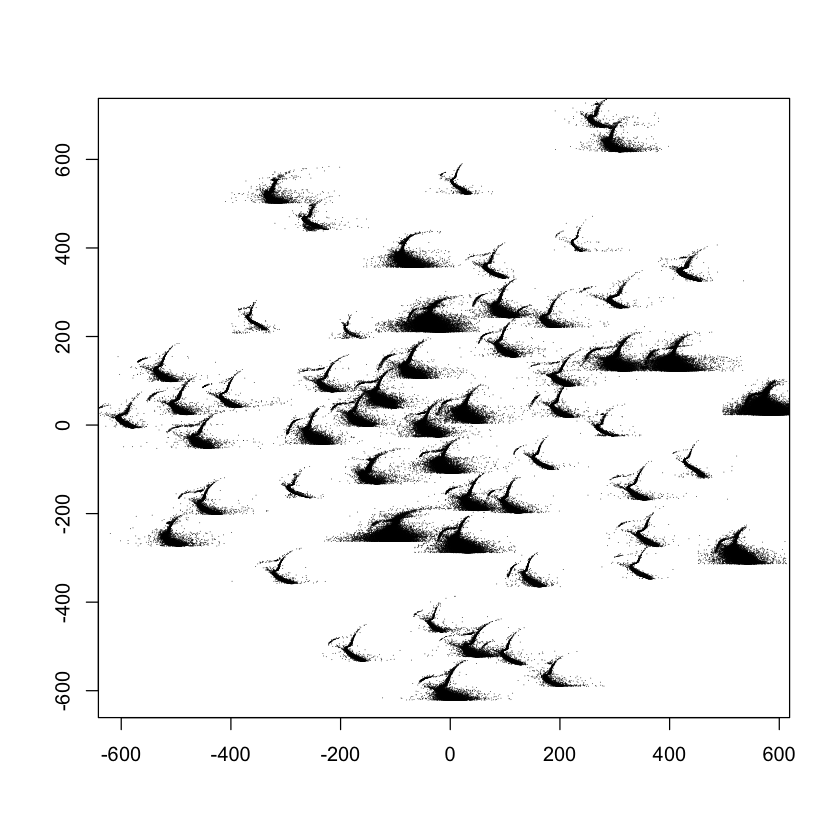

In [25]:
plot(tsne_realGC_features, type = 'n', xlab = "", ylab = "")
L <- length(realGCs)
coso <- sapply(1:L, function(i)
    {
        realGC <- realGCs[i]
        cmd <- read.csv(realGC, header = FALSE) #read the file
        cmd <- cmd[(cmd$V1 - cmd$V2) > -1 & (cmd$V1 - cmd$V2) < 3, ] #set some limits on color
        x <- cmd$V1 - cmd$V2 #F814W - F606W
        y <- -cmd$V2 #F606W; in the actual plot we will reverse the axis properly
        points(10*scale(x) + tsne_realGC_features[i,1],10*scale(y) + tsne_realGC_features[i,2],pch = 16, cex = 0.1)
        #features <- myQuadTree(x,-y,k=4,doPlot=FALSE) #-y and reversedAxis=TRUE for plotting purposes only
     })
#text(tsne_realGC_features, realGCs)

In [16]:
help(tsne)